In [1]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_table('dataset/fruit_with_colors.txt')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [3]:
df.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [4]:
label_mapping = dict(zip(df.fruit_label.unique(),df.fruit_name.unique()))
label_mapping

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [5]:
df.fruit_name.value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

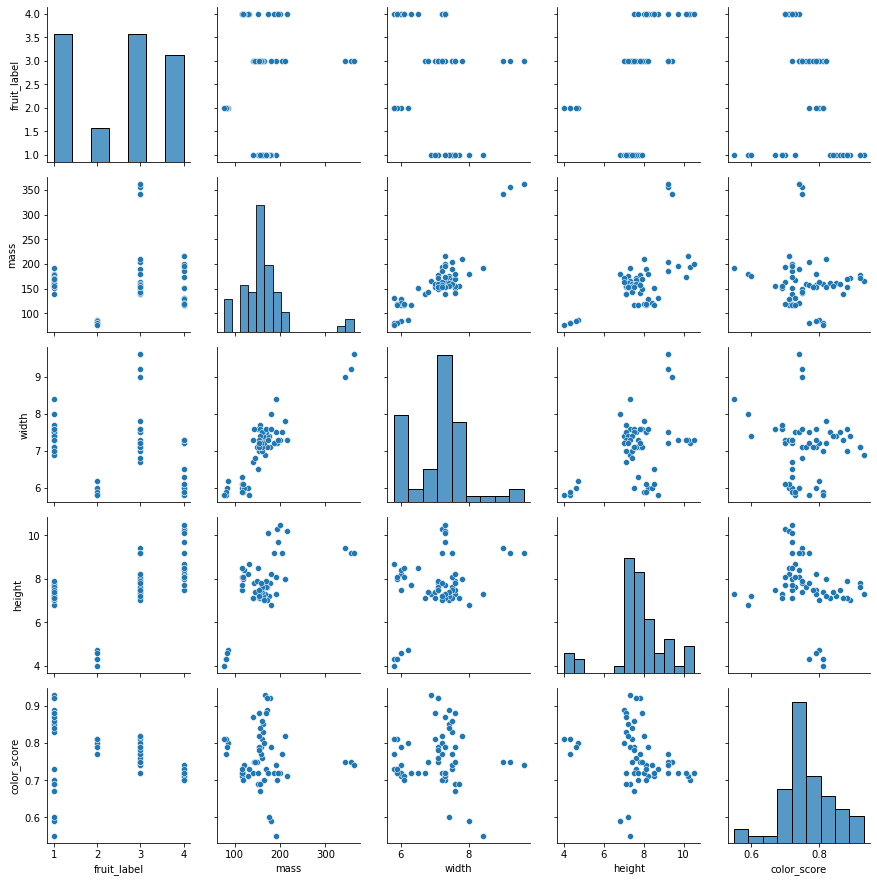

In [6]:
import seaborn as sns
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [7]:
X = df[['mass','width','height','color_score']]
y = df.fruit_label

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.40559441, 0.68421053, 0.50769231, 0.        ],
       [0.36363636, 0.57894737, 0.43076923, 0.10526316],
       [0.34965035, 0.42105263, 0.49230769, 0.13157895],
       [0.03496503, 0.10526316, 0.10769231, 0.65789474],
       [0.02797203, 0.05263158, 0.09230769, 0.63157895],
       [0.01398601, 0.        , 0.04615385, 0.57894737],
       [0.01398601, 0.02631579, 0.04615385, 0.68421053],
       [0.        , 0.        , 0.        , 0.68421053],
       [0.35664336, 0.34210526, 0.58461538, 0.97368421],
       [0.33566434, 0.42105263, 0.46153846, 0.89473684],
       [0.31468531, 0.28947368, 0.50769231, 1.        ],
       [0.33566434, 0.34210526, 0.55384615, 0.97368421],
       [0.27272727, 0.31578947, 0.47692308, 0.86842105],
       [0.30769231, 0.39473684, 0.56923077, 0.39473684],
       [0.26573427, 0.47368421, 0.50769231, 0.36842105],
       [0.27972028, 0.5       , 0.47692308, 0.36842105],
       [0.27972028, 0.47368421, 0.53846154, 0.31578947],
       [0.32167832, 0.44736842,

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y,random_state=0)
len(X_train)

44

In [10]:
from sklearn.neighbors import KNeighborsClassifier
m1 = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
acc1 = m1.score(X_test,y_test)
acc1

0.5333333333333333

In [14]:
# With Scaling
m1 = KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled,y_train)
acc1 = m1.score(X_test_scaled,y_test)
acc1

1.0

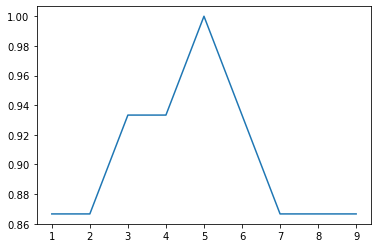

In [21]:
# K terbaik
K = np.arange(1,10)
akurasi = []
for k in K :
    m1 = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled,y_train)
    acc1 = m1.score(X_test_scaled,y_test)
    akurasi.append(acc1)
    
import matplotlib.pyplot as plt
plt.plot(K,akurasi)
plt.show()